In [3]:
#This notebook can be used to predict and view results

In [4]:
#Import dependencies. 
#Ensure that you have built the cython extensions using and your current working directory is the 'darkflow' where this code exists
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from darkflow.net.build import TFNet
import cv2
import sys
import os

In [6]:
#You have to parse the parameters and give the options before you can build the model and start testing
#imgdir: This indicates the location of test directory with all the images that you need to test.
#Threshold: Only predictions which have confidence greater than 0.5 will be showm
#gpu: Indicates how much of the gpu capacity you want to utilize
options = {
            "model": r"cfg/yolo_custom.cfg", 
           "load":96876,
           "labels": r"labels.txt",
           "imgdir": r"../test_images",
           "threshold":0.5,
           "gpu":0.8,
                  
           
          }


In [8]:
tfnet = TFNet(options)

Parsing cfg/yolo_custom.cfg
Loading None ...
Finished in 0.0009999275207519531s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 7

In [9]:
#Predicts for all the images in the directory indicated by the imgdir option. It saves the output in folder withing this directory called 'out'
result =tfnet.predict()

Forwarding 16 inputs ...
Total time = 17.705000162124634s / 16 inps = 0.9036995116344563 ips
Post processing 16 inputs ...
Total time = 0.7039999961853027s / 16 inps = 22.72727285042282 ips
Forwarding 12 inputs ...
Total time = 11.86899995803833s / 12 inps = 1.0110371591898903 ips
Post processing 12 inputs ...
Total time = 0.5799999237060547s / 12 inps = 20.68965789395798 ips


[{'label': 'pipes', 'confidence': 0.8424399, 'topleft': {'x': 532, 'y': 11}, 'bottomright': {'x': 608, 'y': 407}}, {'label': 'pipes', 'confidence': 0.81655306, 'topleft': {'x': 819, 'y': 3}, 'bottomright': {'x': 1019, 'y': 427}}, {'label': 'pipes', 'confidence': 0.6632739, 'topleft': {'x': 2418, 'y': 28}, 'bottomright': {'x': 2460, 'y': 417}}, {'label': 'pipes', 'confidence': 0.7125171, 'topleft': {'x': 2004, 'y': 28}, 'bottomright': {'x': 2067, 'y': 430}}, {'label': 'sign', 'confidence': 0.9636037, 'topleft': {'x': 1786, 'y': 237}, 'bottomright': {'x': 1861, 'y': 430}}, {'label': 'tracks', 'confidence': 0.86595887, 'topleft': {'x': 1144, 'y': 8}, 'bottomright': {'x': 1540, 'y': 426}}]


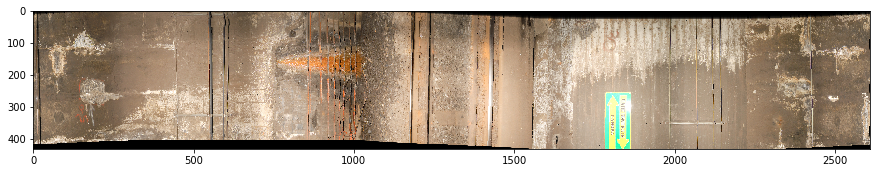

In [10]:
#Shows original image and predictions for a single image
original_img = cv2.imread(r"..\test_images\\0439 to 0455.png")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)
print(results)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)
plt.show()

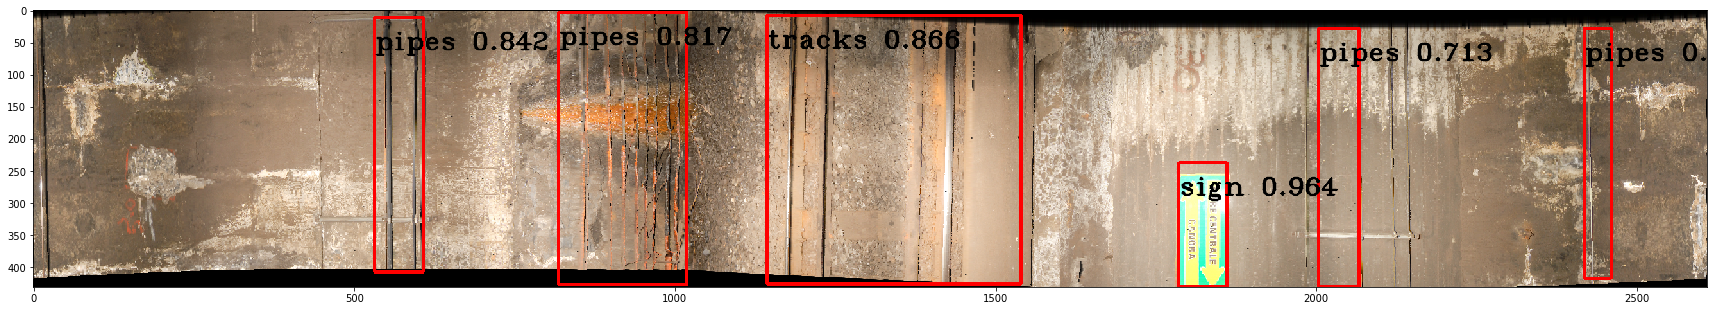

In [11]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.5:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y+50), cv2.FONT_HERSHEY_COMPLEX_SMALL , 2, (0, 0, 0), 2, cv2.LINE_AA)
        
    return newImage
fig, ax = plt.subplots(figsize=(30, 200))
ax.imshow(boxing(original_img, results))
plt.show()